# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [107]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

In [108]:
cities[0]
ex = 'hambantota'

url = f'https://api.openweathermap.org/data/2.5/weather?q={ex}&appid={weather_api_key}'
response = requests.get(url).json()


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [109]:
# Set the API base URL
# url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']-270
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        t = time.localtime(city_weather['dt'])
        t.tm_year
        t.tm_mon
        t.tm_yday
        # date = f'{t.tm_year}-{t.tm_mon}-{t.tm_yday}'
        city_date = f'{t.tm_year}-{t.tm_mon}-{t.tm_yday}'

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kostyantynivka
Processing Record 2 of Set 1 | broome
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | jalu
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | baie-comeau
Processing Record 14 of Set 1 | voh
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | oranjestad
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | pochutla
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1

In [110]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [111]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kostyantynivka,48.5277,37.7069,5.97,45,0,3.26,UA,2023-1-27
1,broome,42.2506,-75.8330,0.58,88,100,2.06,US,2023-1-27
2,arraial do cabo,-22.9661,-42.0278,30.07,74,20,2.06,BR,2023-1-27
3,castro,-24.7911,-50.0119,19.79,75,3,1.81,BR,2023-1-27
4,jalu,29.0331,21.5482,23.04,25,83,1.64,LY,2023-1-27


In [112]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [113]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kostyantynivka,48.5277,37.7069,5.97,45,0,3.26,UA,2023-1-27
1,broome,42.2506,-75.8330,0.58,88,100,2.06,US,2023-1-27
2,arraial do cabo,-22.9661,-42.0278,30.07,74,20,2.06,BR,2023-1-27
3,castro,-24.7911,-50.0119,19.79,75,3,1.81,BR,2023-1-27
4,jalu,29.0331,21.5482,23.04,25,83,1.64,LY,2023-1-27


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [114]:
time.localtime()


# response['sys']['sunrise']
t = time.localtime()
t.tm_year
t.tm_mon
t.tm_yday
date = f'{t.tm_year}-{t.tm_mon}-{t.tm_yday}'
date


'2023-1-27'

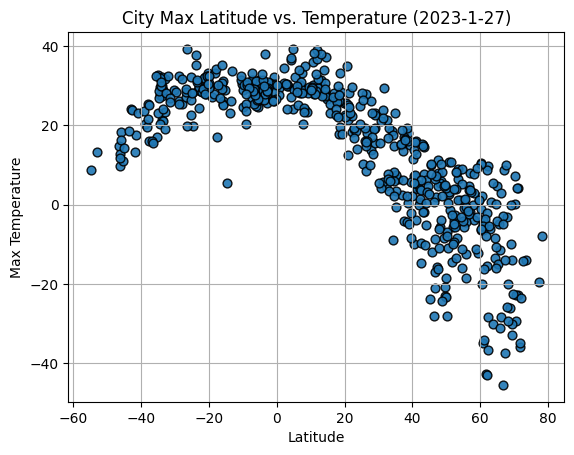

In [115]:
city_data_df.plot.scatter(x='Lat', y='Max Temp', s=40, edgecolors='black', alpha=.90)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.grid(visible=True)
plt.show()

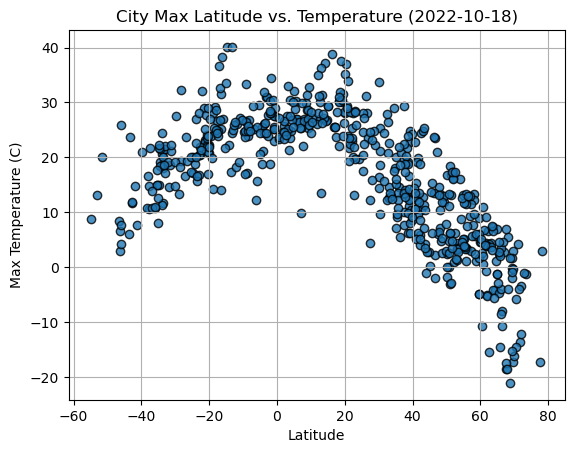

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter(x='lat', y='lng')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

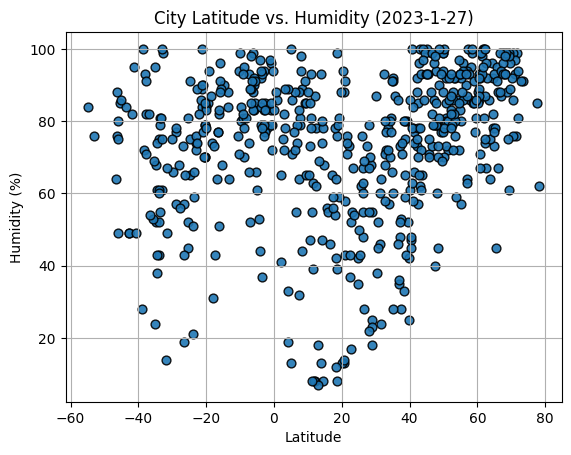

In [116]:
city_data_df.plot.scatter(x='Lat', y='Humidity', s=40, edgecolors='black', alpha=.90)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid(visible=True)
plt.show()

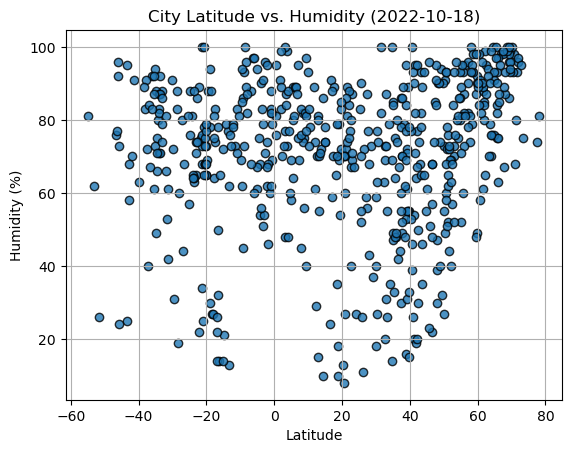

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

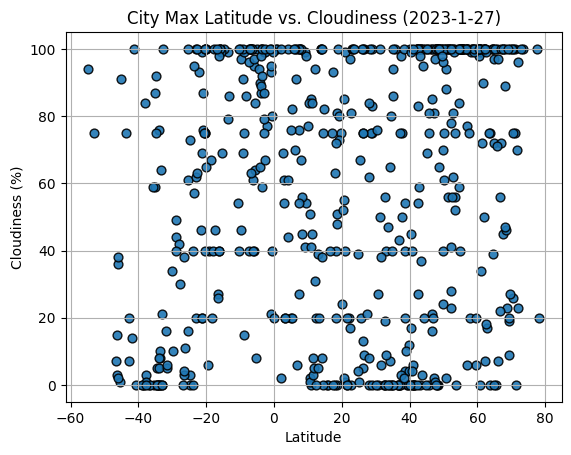

In [118]:
city_data_df.plot.scatter(x='Lat', y='Cloudiness', s=40, edgecolors='black', alpha=.90)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Max Latitude vs. Cloudiness ({date})')
plt.grid(visible=True)
plt.show()

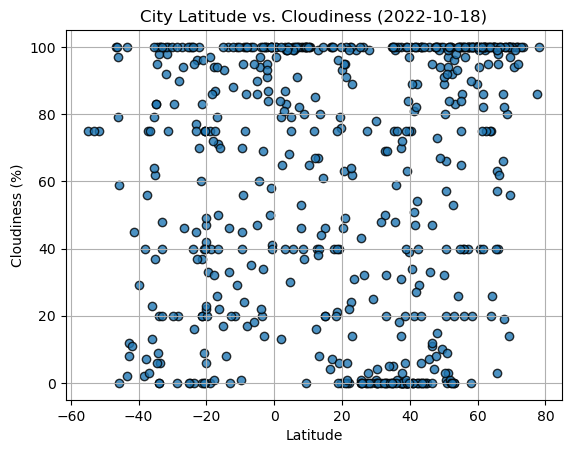

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

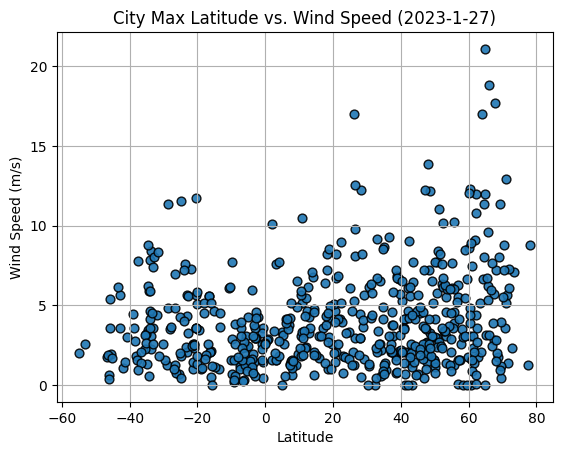

In [119]:
city_data_df.plot.scatter(x='Lat', y='Wind Speed', s=40, edgecolors='black', alpha=.90)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitude vs. Wind Speed ({date})')
plt.grid(visible=True)
plt.show()

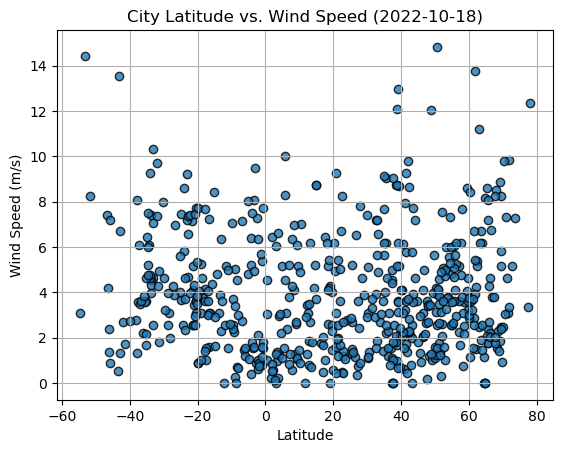

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [120]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kostyantynivka,48.5277,37.7069,5.97,45,0,3.26,UA,2023-1-27
1,broome,42.2506,-75.8330,0.58,88,100,2.06,US,2023-1-27
4,jalu,29.0331,21.5482,23.04,25,83,1.64,LY,2023-1-27
5,albany,42.6001,-73.9662,0.47,85,83,1.38,US,2023-1-27
6,jamestown,42.0970,-79.2353,-0.08,73,100,4.63,US,2023-1-27


In [121]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,arraial do cabo,-22.9661,-42.0278,30.07,74,20,2.06,BR,2023-1-27
3,castro,-24.7911,-50.0119,19.79,75,3,1.81,BR,2023-1-27
8,hobart,-42.8794,147.3294,24.07,49,20,5.66,AU,2023-1-27
10,voh,-20.9667,164.7000,27.98,90,76,2.32,NC,2023-1-27
11,ushuaia,-54.8000,-68.3000,8.66,84,94,2.00,AR,2023-1-27


###  Temperature vs. Latitude Linear Regression Plot

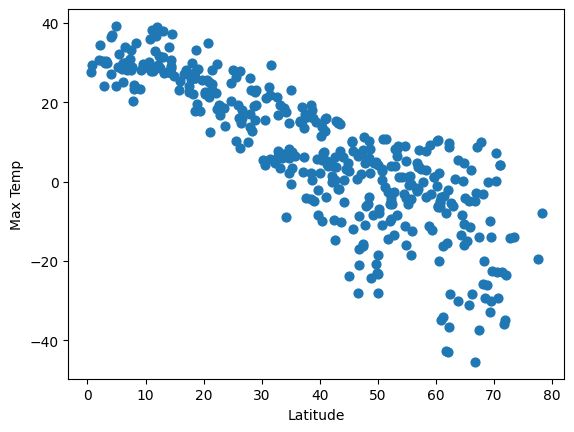

In [122]:
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.7161472181434118


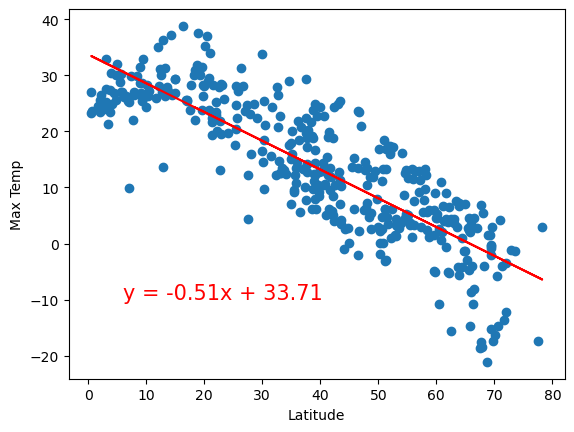

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

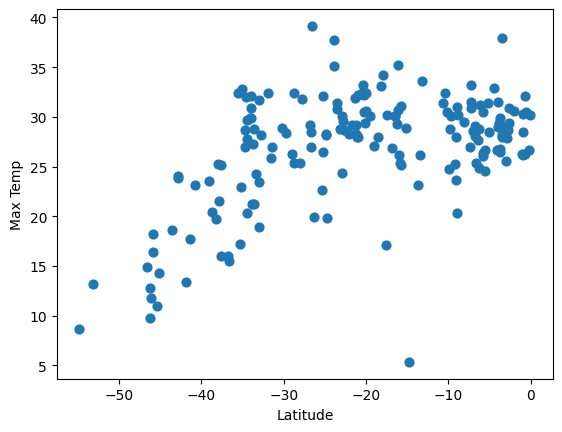

In [123]:
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.4121057168607245


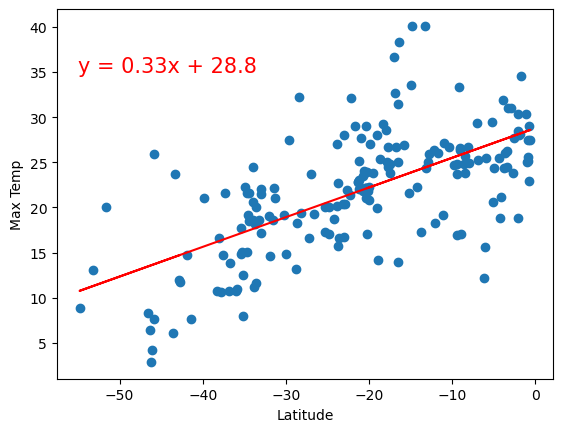

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

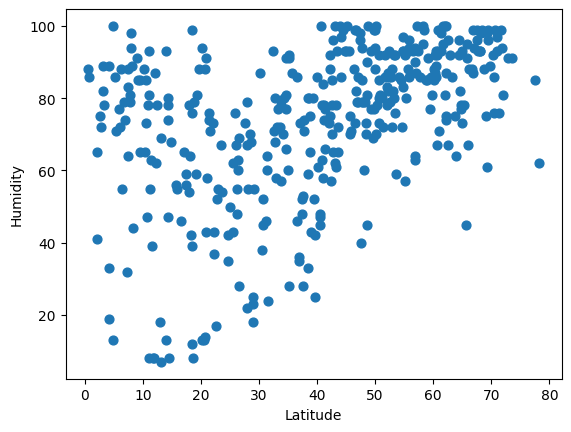

In [124]:
northern_hemi_df.plot.scatter(x='Lat', y='Humidity', s=40)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.title(f'City Latitude vs. Humidity ({date})')
# plt.grid(visible=True)
plt.show()

The r-value is: 0.05689741545789598


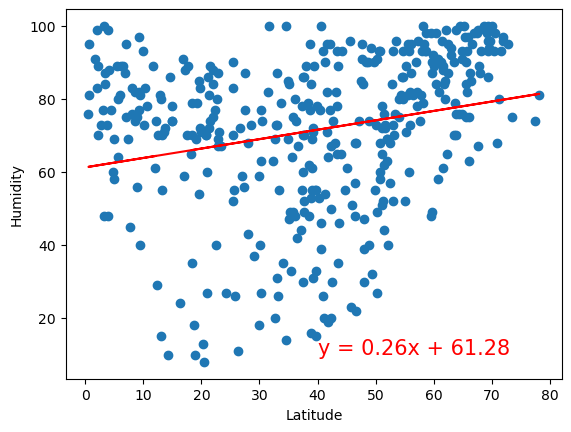

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

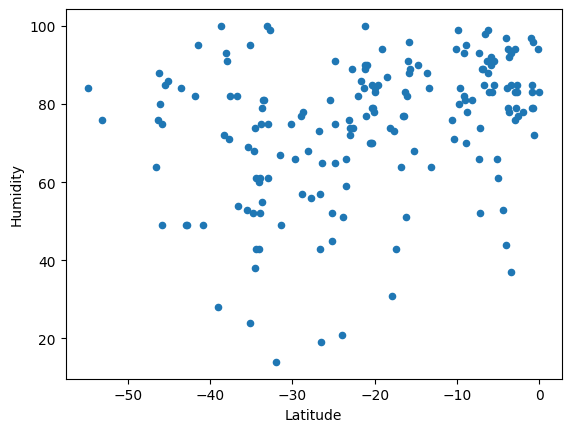

In [125]:
southern_hemi_df.plot.scatter(x='Lat', y='Humidity')
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.title(f'City Latitude vs. Humidity ({date})')
# plt.grid(visible=True)
plt.show()

The r-value is: 0.0002808747046324607


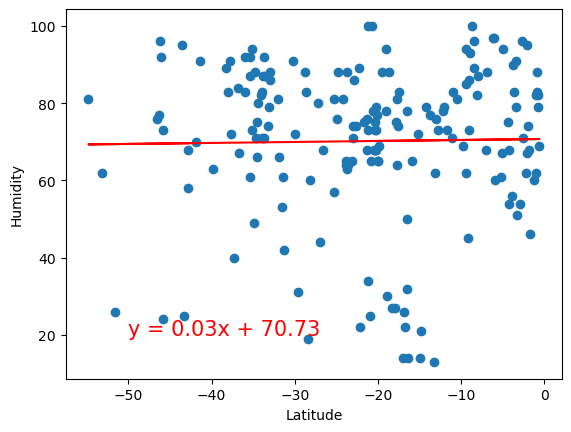

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

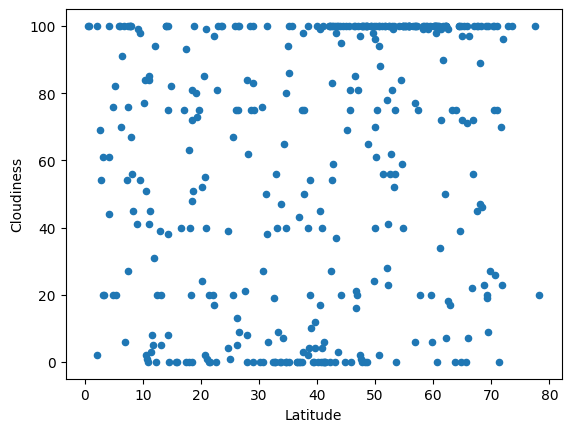

In [126]:
northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness')
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.title(f'City Max Latitude vs. Cloudiness ({date})')
# plt.grid(visible=True)
plt.show()

The r-value is: 0.024026517125811015


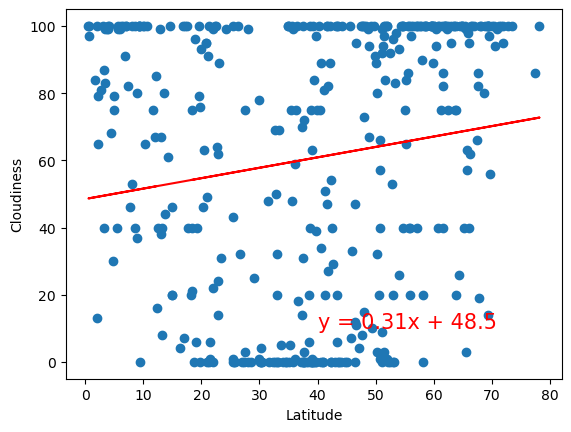

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

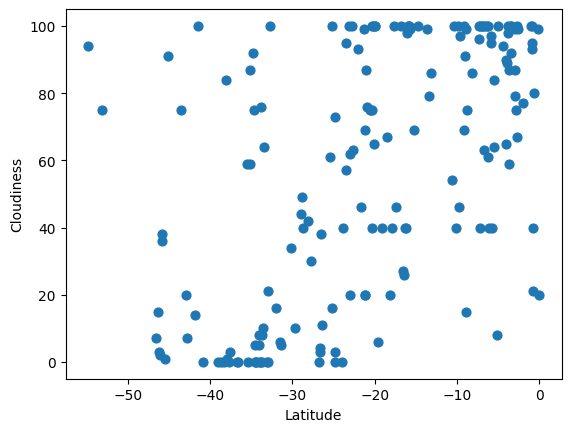

In [127]:
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=40)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.title(f'City Max Latitude vs. Cloudiness ({date})')
# plt.grid(visible=True)
plt.show()

The r-value is: 0.02056735429994368


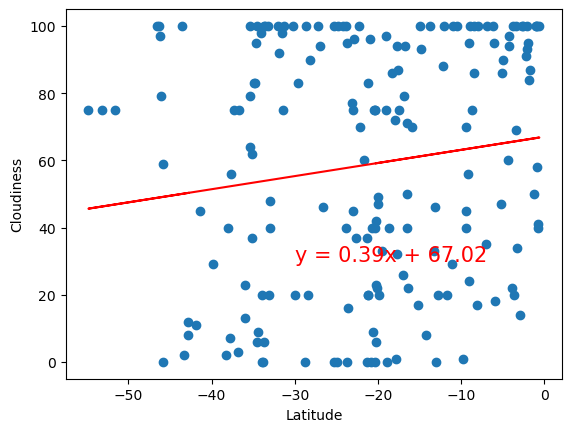

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

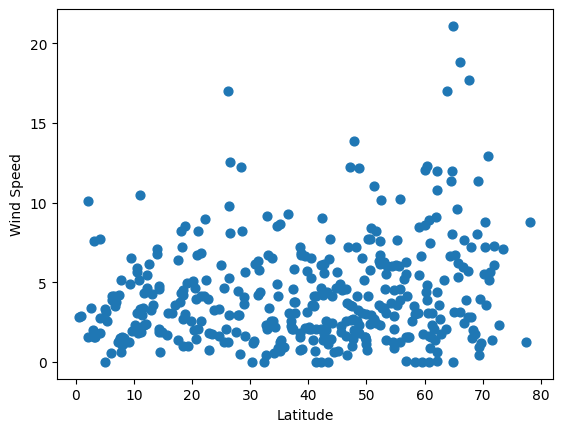

In [128]:
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.030396762354449467


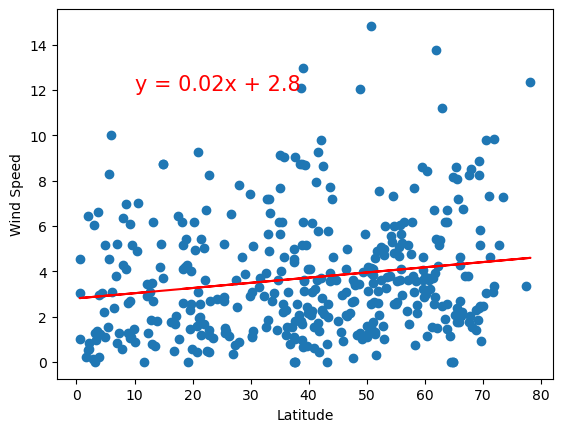

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

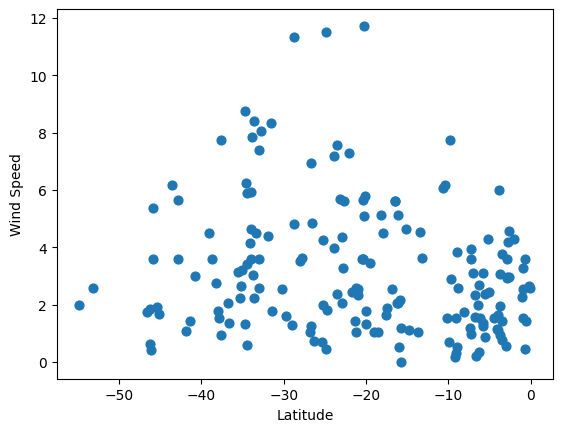

In [129]:
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: 0.062239040700515696


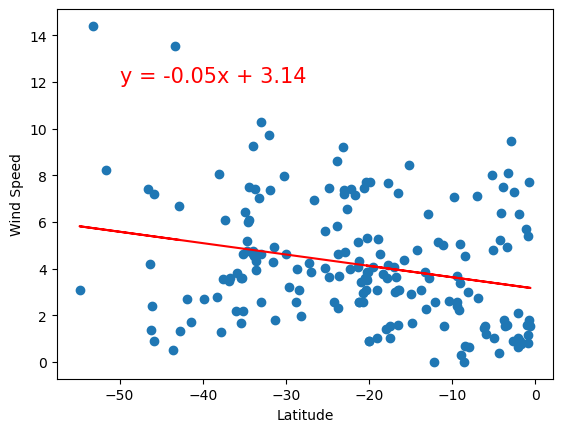

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE